<a href="https://colab.research.google.com/github/nhanguyene/HOMEWORK_AI_21_05_22/blob/main/CNN_Detect_Fruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries
import glob
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from random import randint
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#Connect with my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Get dataset from drive
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
training_set=train.flow_from_directory('/content/drive/MyDrive/AI/FRUIT/train/train',target_size=(150,150), batch_size=40, class_mode='categorical')
validation_set=validation.flow_from_directory('/content/drive/MyDrive/AI/FRUIT/train/val',target_size=(150,150), batch_size=40, class_mode='categorical')

Found 338 images belonging to 10 classes.
Found 338 images belonging to 10 classes.


In [5]:
#Check label of dataset
training_set.class_indices

{'passionfruit': 0,
 'peaches': 1,
 'pears': 2,
 'pineapples': 3,
 'plums': 4,
 'pomegranates': 5,
 'raspberries': 6,
 'strawberries': 7,
 'tomatoes': 8,
 'watermelons': 9}

In [6]:
#Create Model for train
model = Sequential()
model.add(Conv2D(16,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [7]:
#Training
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',  metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(training_set, epochs = 10, validation_data = validation_set, verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=15)])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
9/9 [==============================] - 262s 29s/step - loss: 57.5984 - accuracy: 0.2012 - val_loss: 21.3964 - val_accuracy: 0.2988
Epoch 2/10
9/9 [==============================] - 21s 2s/step - loss: 12.2867 - accuracy: 0.3876 - val_loss: 2.3318 - val_accuracy: 0.6006
Epoch 3/10
9/9 [==============================] - 21s 2s/step - loss: 1.8595 - accuracy: 0.6509 - val_loss: 0.6878 - val_accuracy: 0.8107
Epoch 4/10
9/9 [==============================] - 21s 2s/step - loss: 0.8379 - accuracy: 0.8077 - val_loss: 0.4958 - val_accuracy: 0.8462
Epoch 5/10
9/9 [==============================] - 21s 2s/step - loss: 6.3797 - accuracy: 0.5207 - val_loss: 3.3969 - val_accuracy: 0.5148
Epoch 6/10
9/9 [==============================] - 21s 2s/step - loss: 2.2402 - accuracy: 0.6893 - val_loss: 0.1163 - val_accuracy: 0.9704
Epoch 7/10
9/9 [==============================] - 21s 2s/step - loss: 0.1391 - accuracy: 0.9556 - val_loss: 0.0451 - val_accuracy: 0.9911
Epoch 8/10
9/9 [=============

In [8]:
#Save a file after train
model.save('CNN_FRUIT.h5')

Test error:  0.8940480351448059
Test accuracy:  0.784023642539978


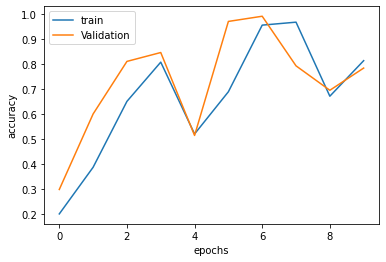

In [9]:
#Draw plot and evaluate
score = model.evaluate(validation_set,verbose=0)
print('Test error: ',score[0])
print('Test accuracy: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [10]:
#Load trained file
CNN_FRUIT =load_model('CNN_FRUIT.h5')

9
watermelons


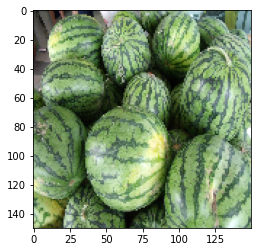

In [15]:
#Check detect
img_path = '/content/drive/MyDrive/AI/FRUIT/test/52.jpg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
Fruit=np.argmax(CNN_FRUIT.predict(img),axis=1)
pred = model.predict(img)
classes = ['passionfruit','peaches','pears','pineapples','plums','pomegranates','raspberries','strawberries','tomatoes','watermelons']
print(np.argmax(pred))
if Fruit==0: print(classes[0])
elif Fruit==1: print(classes[1])
elif Fruit==2: print(classes[2])
elif Fruit==3: print(classes[3])
elif Fruit==4: print(classes[4])
elif Fruit==5: print(classes[5])
elif Fruit==6: print(classes[6])
elif Fruit==7: print(classes[7])
elif Fruit==8: print(classes[8])
elif Fruit==9: print(classes[9])